# A Data Science Investigation About Fatal Car Crashes in America 

It's a collection of data on the reasons fatal car crashes occur in every state of America, and it will be used to determine which region of America is the deadliest. 

## Overarching Question: What is the deadliest region in America to drive in?

I am interested in this because I live on the Northeast Coast and we have a lot of car 
accidents. People drive very fast here. The roads are not always paved properly and maintained. I want to know if it's just bad luck when people get into accidents or if it's their own fault. 

# Data

In [10]:
#Include any import statements you will need
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
### 💻 FILL IN YOUR DATASET FILE NAME BELOW 💻 ###

file_name = "B_D2 - bad-drivers.csv"
dataset_path = "data/" + file_name

df = pd.read_csv(dataset_path)

In [12]:
df.head()

State  number_drivers_fatal_billion_miles  \
0     Alabama                                18.8   
1      Alaska                                18.1   
2     Arizona                                18.6   
3    Arkansas                                22.4   
4  California                                12.0   

   percentage_drivers_fatal_speeding  \
0                                 39   
1                                 41   
2                                 35   
3                                 18   
4                                 35   

   percentage_drivers_fatal_alcohol_impaired  \
0                                         30   
1                                         25   
2                                         28   
3                                         26   
4                                         28   

   percentage_drivers_fatal_not_distracted  \
0                                       96   
1                                       90   
2                                       84   
3                                       94   
4                                       91   

   percentage_drivers_fatal_no_previous_accidents  car_insurance_premiums  \
0                                              80                  784.55   
1                                              94                 1053.48   
2                                              96                  899.47   
3                                              95                  827.34   
4                                              89                  878.41   

      region  
0  Southeast  
1       West  
2  Southeast  
3  Southeast  
4       West

**Data Overview**

### When is this data set from?

I got the data set from FiveThirtyEight. It was used for an article called
"Dear Mona, Which state has the worst drivers?" in October 2014. The data they used for this article were gathered over different years between 2009 and 2012. The person who wrote the article is Mona Chalabi, they are a data editor at the Guardian US, a columnist at New York Magazine, and a lead news writer for FiveThirtyEight. 

The date is about fatal collisions in each state. There are 8 rows:

1. State
2. Number of drivers involved in fatal collisions per billion miles
3. Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
4. Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
5. Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
6. Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
7. Car Insurance Premiums ($)
8. Region

### How did this data set get clean?

I did not need to do much data cleaning myself, but I did add a "Region" column to split the states into 4 regions: Midwest, Southeast, West, and Northeast. I also excluded data on Losses incurred by insurance companies for collisions per insured driver because insurance companies are well known for finding ways to avoid paying customers for collisions, so this is not an accurate representation of fatal car crashes.    

## What specific research questions will you investigate?

1. What region has the highest drinking and driving cause of fatal collisions?

2. What region has the highest car insurance premiums?

3. What region is the most unlucky state for fatal collisions?

4. Is there a connection between the average Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding and the Number of drivers involved in fatal collisions per billion miles?



In [13]:
df.columns

Index(['State', 'number_drivers_fatal_billion_miles',
       'percentage_drivers_fatal_speeding',
       'percentage_drivers_fatal_alcohol_impaired',
       'percentage_drivers_fatal_not_distracted',
       'percentage_drivers_fatal_no_previous_accidents',
       'car_insurance_premiums', 'region'],
      dtype='object')

# Methods and Results

In [14]:
import seaborn as sns
sns.set_theme

<function seaborn.rcmod.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## First Research Question: What region has the highest drinking and driving cause of fatal collisions?

### Methods

*Explain how you will approach this research question below. Consider the following:* 
  - *Which aspects of the dataset will you use?* 
  - *How will you reorganize/store the data?* 
  - *What data science tools/functions will you use and why?* 
  
✏️ *Write your answer below:*

To answer this question, I will organize the data for each state by the region it is in. Then, calculate the average percentage of drivers involved in fatal collisions who were alcohol-impaired. Finally, I will make a bar plot to compare the average number of fatal collisions that involved drinking and driving for each of the regions



### Results 

In [15]:
#######################################################################
### 💻 YOUR WORK GOES HERE TO ANSWER THE FIRST RESEARCH QUESTION 💻 
### 
### Your data analysis may include a statistic and/or a data visualization
#######################################################################

region = df.groupby("region").percentage_drivers_fatal_alcohol_impaired.mean().sort_values()
region


region
Southeast    29.687500
West         30.363636
Northeast    31.333333
Midwest      31.666667
Name: percentage_drivers_fatal_alcohol_impaired, dtype: float64

<Axes: xlabel='region', ylabel='percentage_drivers_fatal_alcohol_impaired'>

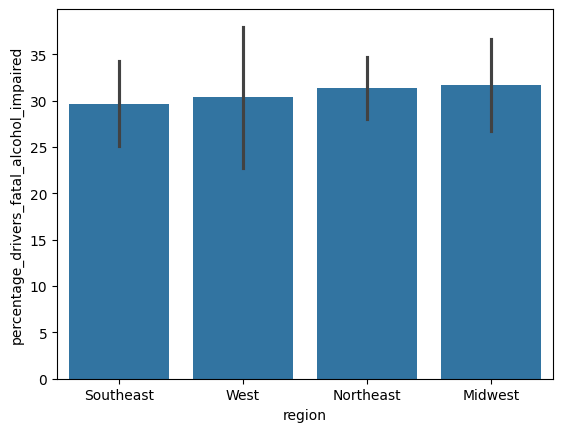

In [16]:
sns.barplot(data=df, x="region", y="percentage_drivers_fatal_alcohol_impaired", errorbar="sd")

This graph shows that the Midwest region has the highest percentage of drivers involved in fatal collisions who were alcohol-impaired in 2012

## Second Research Question: What region has the highest car insurance premiums?


### Methods

*Explain how you will approach this research question below. Consider the following:* 
  - *Which aspects of the dataset will you use?* 
  - *How will you reorganize/store the data?* 
  - *What data science tools/functions will you use and why?* 

✏️ *Write your answer below:*

To answer this question, I will organize the data for each state by the region it is in. Then, compare the average cost of car insurance and see which region is the highest.


### Results 

In [17]:
#######################################################################
### 💻 YOUR WORK GOES HERE TO ANSWER THE SECOND RESEARCH QUESTION 💻 
###
### Your data analysis may include a statistic and/or a data visualization
#######################################################################

df.groupby("region").car_insurance_premiums.mean().sort_values()

region
Midwest       756.630833
West          855.624545
Southeast     905.472500
Northeast    1021.320000
Name: car_insurance_premiums, dtype: float64

<Axes: xlabel='region', ylabel='car_insurance_premiums'>

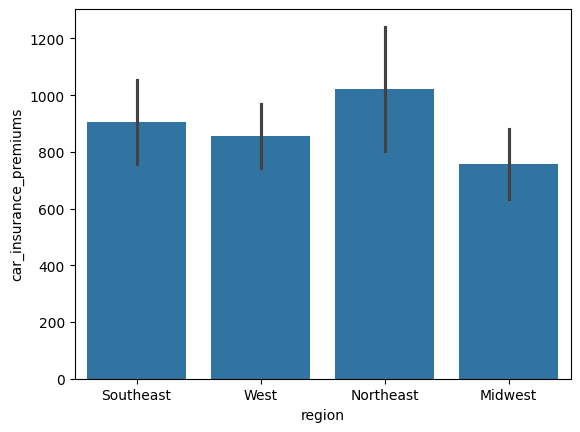

In [31]:
sns.barplot(data=df, x="region", y="car_insurance_premiums", errorbar="sd")

The graph shows that the region with the highest premium car insurance is the Northwest 

## Third Research Question: What region is the most unlucky for fatal collisions? 

### Methods

*Explain how you will approach this research question below. Consider the following:* 
  - *Which aspects of the dataset will you use?* 
  - *How will you reorganize/store the data?* 
  - *What data science tools/functions will you use and why?* 

✏️ *Write your answer below:*

To answer this question, I will organize the data for each state by the region it is in. Then, compare the average percentage of Drivers Involved In Fatal Collisions Who Were Not Distracted and the average percentage of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents.

In [32]:
region = df.groupby("region")
region_mean = region[["percentage_drivers_fatal_not_distracted", "percentage_drivers_fatal_no_previous_accidents"]].mean().sort_values("region")
region_mean

percentage_drivers_fatal_not_distracted  \
region                                               
Midwest                                  88.833333   
Northeast                                88.666667   
Southeast                                83.000000   
West                                     84.000000   

           percentage_drivers_fatal_no_previous_accidents  
region                                                     
Midwest                                         86.666667  
Northeast                                       87.250000  
Southeast                                       89.312500  
West                                            91.727273

<Axes: xlabel='region', ylabel='percentage_drivers_fatal_not_distracted'>

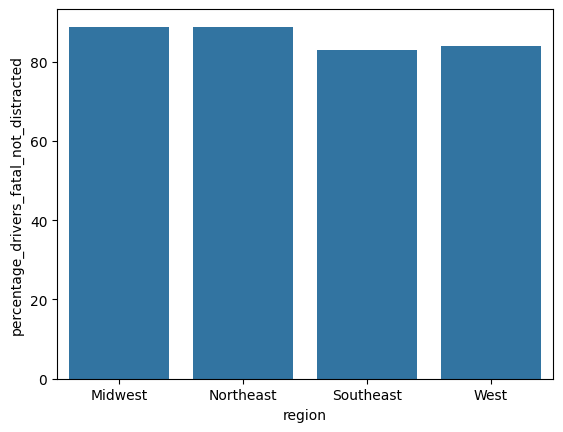

In [33]:
sns.barplot(data=region_mean, x="region", y="percentage_drivers_fatal_not_distracted")


<Axes: xlabel='region', ylabel='percentage_drivers_fatal_no_previous_accidents'>

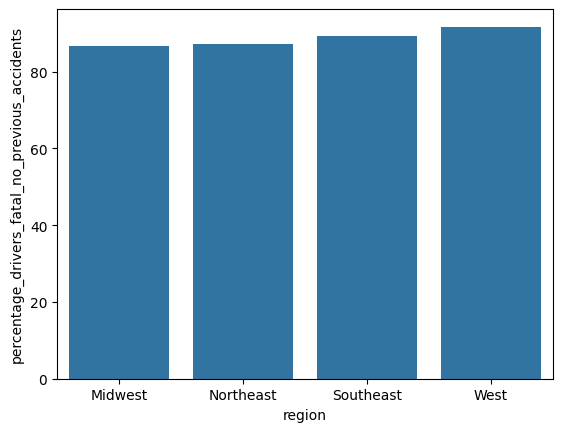

In [34]:
sns.barplot(data=region_mean, x="region", y="percentage_drivers_fatal_no_previous_accidents")

After looking at the two bar graphs about the percentage of drivers involved in fatal collisions who were not distracted and the percentage of drivers involved in fatal collisions who had not been involved in any previous accidents, it seems that the Midwest region has the highest percentage in Fatal Collisions Who Were Not Distracted and the West region had more drivers in Fatal Collisions Who Had Not Been Involved In Any Previous Accidents both categories.

## Fourth Research Question: Is there a connection between the average Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding and the Number of drivers involved in fatal collisions per billion miles?

### Methods

Explain how you will approach this research question below. Consider the following:

Which aspects of the dataset will you use?
How will you reorganize/store the data?
What data science tools/functions will you use and why?
✏️ Write your answer below:

To answer this question, I will organize the data for each state by the region it is in. Then, compare the average Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding to see if there is a connection with the region with the highest car insurance.

In [18]:
region = df.groupby("region")
region_speed_insur = region[["percentage_drivers_fatal_speeding", "number_drivers_fatal_billion_miles"]].mean().sort_values("region")
region_speed_insur

percentage_drivers_fatal_speeding  \
region                                         
Midwest                            27.166667   
Northeast                          34.166667   
Southeast                          27.687500   
West                               39.909091   

           number_drivers_fatal_billion_miles  
region                                         
Midwest                             15.558333  
Northeast                           12.225000  
Southeast                           19.200000  
West                                14.972727

<Axes: xlabel='region', ylabel='percentage_drivers_fatal_speeding'>

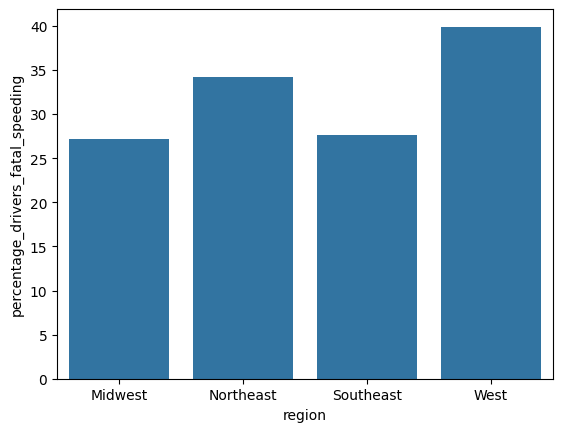

In [19]:
sns.barplot(data=region_speed_insur, y="percentage_drivers_fatal_speeding", x="region")

<Axes: xlabel='region', ylabel='number_drivers_fatal_billion_miles'>

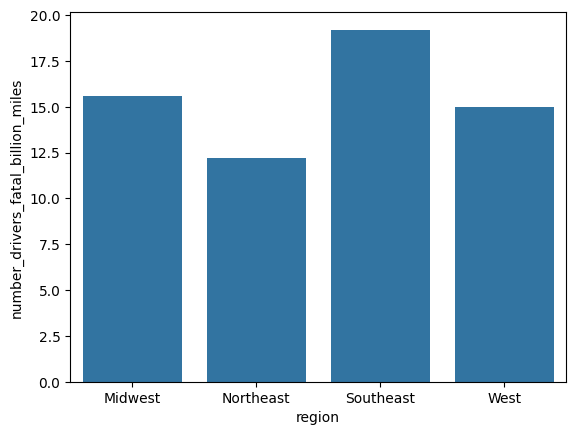

In [20]:
sns.barplot(data=region_speed_insur, x="region", y="number_drivers_fatal_billion_miles")

Comparing these two plots, it seems that there is no connection between the average Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding and the Number of drivers involved in fatal collisions per billion miles. What we did learn is that the West region has the highest speeding-related fatal collisions, and the Southeast has the highest number of fatal collisions per billion miles.

# Discussion

## Considerations

*It's important to recognize the limitations of our research.
Consider the following:*

- *Do the results give an accurate depiction of your research question? Why or why not?*
- *What were the limitations of your dataset?*
- *Are there any known biases in the data?*

✏️ *Write your answer below:*

I believe that the results do give an accurate depiction of my research question because it takes 6 different causes of fatal collisions and averages them between the 5 regions of the USA. The limitations of the dataset are that it isn't up to date. The data was collected between 2009 and 2012, and some of the collisions are from different years in that time frame. Some biases that could be in this data are how they determined if someone was Alcohol-Impaired, the weather in each region, the maintenance of the roads, and the population.

## Summary

In [9]:
region = df.groupby("region")
region_collision = region[["number_drivers_fatal_billion_miles", "percentage_drivers_fatal_speeding", "percentage_drivers_fatal_alcohol_impaired", "percentage_drivers_fatal_not_distracted", "percentage_drivers_fatal_no_previous_accidents", "car_insurance_premiums"]].mean().sort_values("region")
region_collision

number_drivers_fatal_billion_miles  \
region                                          
Midwest                             15.558333   
Northeast                           12.225000   
Southeast                           19.200000   
West                                14.972727   

           percentage_drivers_fatal_speeding  \
region                                         
Midwest                            27.166667   
Northeast                          34.166667   
Southeast                          27.687500   
West                               39.909091   

           percentage_drivers_fatal_alcohol_impaired  \
region                                                 
Midwest                                    31.666667   
Northeast                                  31.333333   
Southeast                                  29.687500   
West                                       30.363636   

           percentage_drivers_fatal_not_distracted  \
region                                               
Midwest                                  88.833333   
Northeast                                88.666667   
Southeast                                83.000000   
West                                     84.000000   

           percentage_drivers_fatal_no_previous_accidents  \
region                                                      
Midwest                                         86.666667   
Northeast                                       87.250000   
Southeast                                       89.312500   
West                                            91.727273   

           car_insurance_premiums  
region                             
Midwest                756.630833  
Northeast             1021.320000  
Southeast              905.472500  
West                   855.624545

*Summarize what you discovered through the research. Consider the following:*

- *What did you learn about your media consumption/digital habits?*
- *Did the results make sense?*
- *What was most surprising?*
- *How will this project impact you going forward?*

✏️ *Write your answer below:*

Through my research on the deadliest regions to drive in across America, I discovered how much my media consumption shapes what I believe about road safety. I realized that I tend to rely on quick social media clips or headlines that focus on shocking accidents instead of looking at real data or credible reports. Once I analyzed official statistics and news articles, I noticed how different the reality was from what I often see online.

It was surprising to find that the West and Midwest regions both were the highest for 2 out of the six fatal collision categories. Especially since the Midwest is a less populated area than the other regions. 

This project made me more aware of how easily digital content can oversimplify serious issues. Going forward, I’ll be more intentional about checking sources, looking at data before forming opinions, and being more cautious when driving or traveling in high-risk regions. It reminded me that media can influence not just what we think, but how safely we act in real life.